# Intro to Data Analysis
## Final Project: Investigate Data

In this project I will:
1. Choose a dataset (titanic, baseball)
2. Analyse the data
3. Make questions based on the analysis
4. Report found answers

## 1. Choose a dataset
I choose Baseball dataset because it represents a bigger challenge. Let's see what can I do.

In [244]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
%pylab inline

from bokeh.io import output_notebook, show
from bkcharts import Donut
output_notebook()

Populating the interactive namespace from numpy and matplotlib


/home/david/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

In [2]:
# declare helper functions and load dataset
def load_files(data_path, filenames):
    dfs = {}
    for f in filenames:
        parts = f.split('.')
        if parts[1] != 'csv':
            continue
        dfname = parts[0]
        absfilename = data_path + '/' + f
        dfs[dfname] = pd.read_csv(absfilename)
    return dfs

def describe_dataframes(dataframes):
    for df in dataframes:
        print(df)
        display(dataframes[df].describe())
        print('')

data_path = 'data/baseballdatabank-2017.1/core'
filenames = os.listdir(data_path)
dataframes = load_files(data_path, filenames)
# display(sorted(dataframes.keys()))
# describe_dataframes(dataframes)

## 2. Analyse data


### Main Table: Master

In [218]:
dataframes['Master'].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


## Missing Values

In [245]:
rows_with_missing_values = len(dataframes['Master'][dataframes['Master'].isnull().any(axis=1)])
total = len(dataframes['Master'])

def bokeh_pie_chart(values, labels):
    data = pd.Series(values, index=labels)
    pie_chart = Donut(data)
    show(pie_chart)

bokeh_pie_chart([rows_with_missing_values, total-rows_with_missing_values], ['Rows with missing values', 'Rows without missing values'])

As you can see more than 50% of entries, only from *Master* table (players), have missing values. I could not find any relevant missing value directly on tables. However I had to deal with missing relationships between players and schools as you will see underneath.

## 3. Make questions
After analysing the tables for a while, I came up with the following questions, which I expect to answer underneath:

1. Which school did winners go to?
2. Did winners get highest salaries?
3. Is there a correlation between winning teams and managers?

## 4. Report found answers

To answer any question about best players first I will have define what a best player is and how I will score it.

**Best Player**: Player who participated on winning matches through time being part of one or more team.

**Player/Team Score**: Difference between Wins and Losses assigned to every team for each match.

,yearID,W
count,2835.000000,2835.000000
mean,1955.681834,74.814109
std,41.767356,17.591208
min,1871.000000,0.000000
25%,1920.000000,66.000000
50%,1964.000000,77.000000
75%,1993.000000,87.000000
max,2016.000000,116.000000


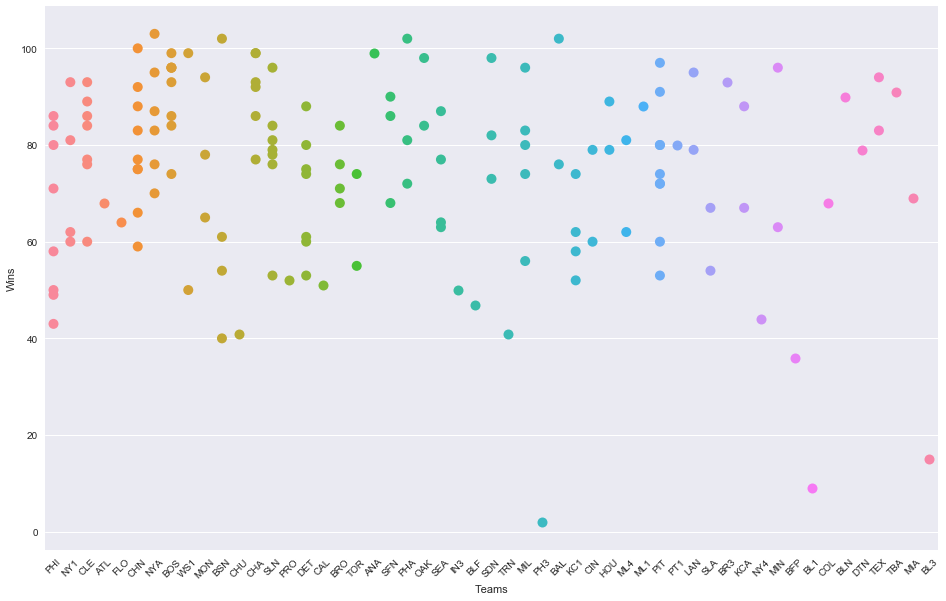

In [158]:
team_wins_by_year = dataframes['Teams'].groupby(['teamID', 'yearID'], as_index=False)['teamID', 'W'].sum()
team_wins_by_year.sort_values('W', ascending=False).describe()
display(team_wins_by_year.describe())
team_wins_by_year_sample = team_wins_by_year.sample(n=150)
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="teamID", y="W", data=team_wins_by_year_sample, size=10)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set(xlabel='Teams', ylabel='Wins')

*Teams by Yearly Wins (whole population)*

In [5]:
team_wins_total = team_wins_by_year.groupby('teamID', as_index=False)['W'].sum()
display(team_wins_total.describe())

,W
count,149.000000
mean,1423.476510
std,2649.598666
min,0.000000
25%,43.000000
50%,118.000000
75%,1373.000000
max,10711.000000


*Some statistical numbers about Team Wins*

,yearID,L
count,2835.000000,2835.000000
mean,1955.681834,74.814109
std,41.767356,17.331455
min,1871.000000,4.000000
25%,1920.000000,65.000000
50%,1964.000000,76.000000
75%,1993.000000,87.000000
max,2016.000000,134.000000


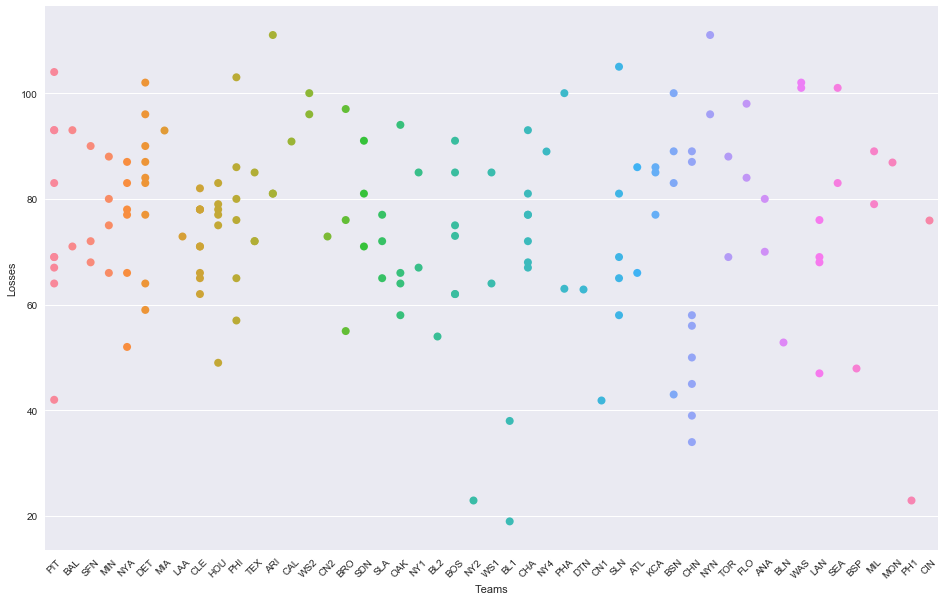

In [161]:
team_losses_by_year = dataframes['Teams'].groupby(['teamID', 'yearID'], as_index=False)['teamID', 'L'].sum()
team_losses_by_year.sort_values('L', ascending=False).describe()
display(team_losses_by_year.describe())
team_losses_by_year_sample = team_losses_by_year.sample(n=150)
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="teamID", y="L", data=team_losses_by_year_sample, size=8)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set(xlabel='Teams', ylabel='Losses')

*Teams by Yearly Losses (whole population)*

In [7]:
team_losses_total = team_losses_by_year.groupby('teamID', as_index=False)['L'].sum()
display(team_losses_total.describe())

,L
count,149.000000
mean,1423.476510
std,2570.942743
min,4.000000
25%,51.000000
50%,149.000000
75%,1575.000000
max,10741.000000


*And some more statistical numbers about Team Losses*

Now I have to *merge* wins and losses in order to get our Team Ranking:

In [208]:
def stripplot(data, size=10, aspect=.25, titles=[], xvars=['W', 'L', 'score'], yvars=['teamID'], sort='score', xlabel='Score', ylabel='Y Label'):
    g = sns.PairGrid(data.sort_values(sort, ascending=False), x_vars=xvars, y_vars=yvars, size=size, aspect=aspect)
    g.map(sns.stripplot, size=size, orient="h",
          palette="Reds_r", edgecolor="gray")
    g.set(xlim=(0, data[sort].max()+100), xlabel=xlabel, ylabel=ylabel)
    for ax, title in zip(g.axes.flat, titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    sns.despine(left=True, bottom=True)
    
def distribution(data, figsize=(7, 5), color='c', labels=('X', 'Y')):
    f, axes = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
    sns.despine(left=True)
    sns.distplot(data, color=color, kde_kws={"shade": True})
    axes.set(xlabel=labels[0], ylabel=labels[1])
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    
def plot_correlation(x, y, xlabel, ylabel, legend):
    ax = sns.regplot(x="x", y="y", data=pd.DataFrame({'x': x, 'y': y}), label=legend, x_jitter=.2)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.legend(loc="best")
    
def plot_correlation2(data, x_var, y_var):
    sns.set(style="darkgrid", color_codes=True)
    g = sns.jointplot(x_var, y_var, data=data, kind="reg",
                      xlim=(0, highest_salaries_players_with_score['score_norm'].max()), ylim=(0, highest_salaries_players_with_score['salary_norm'].max()), color="r", size=7)

    
def display_1d_array(array, col_name='Data'):
    display(pd.DataFrame(array, columns=[col_name], index=[i+1 for i in range(len(array))]))

,W,L,score,score_norm
count,149.000000,149.000000,149.000000,149.000000
mean,1423.476510,1423.476510,0.000000,0.319363
std,2649.598666,2570.942743,312.496768,0.087314
min,0.000000,4.000000,-1143.000000,0.000000
25%,43.000000,51.000000,-60.000000,0.302598
50%,118.000000,149.000000,-12.000000,0.316010
75%,1373.000000,1575.000000,20.000000,0.324951
max,10711.000000,10741.000000,2436.000000,1.000000


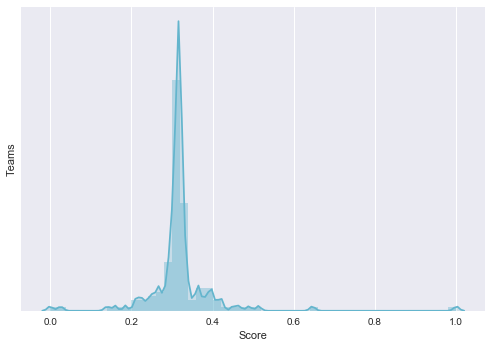

In [164]:
teams_results = team_wins_total.merge(team_losses_total, on='teamID', how='inner')
teams_results['score'] = teams_results.apply(lambda x: x['W'] - x['L'], axis=1)

tscores = teams_results['score'].values
tscore_norm = MinMaxScaler().fit_transform(tscores.astype(np.float64).reshape(-1, 1)).flatten()
teams_results['score_norm'] = tscore_norm
display(teams_results.describe())
distribution(tscore_norm, labels=('Score', 'Teams'))

Here is the distribution of *Team Scores*.

I calculated the scores using *Feature Scaling* in a vectorized *Numpy* operation, in order to compare Team Scores against Player Scores later.

### Best Teams
Since Teams are many, I will take a sample using *Pandas' quantile* function set to 0.8 in order to get only the best 20% of best teams.

In [13]:
best_teams = teams_results[teams_results['score'] > teams_results.quantile(q=0.8)['score']].sort_values('score', ascending=False)
display(best_teams.describe())

,W,L,score,score_norm
count,29.000000,29.000000,29.000000,29.000000
mean,4435.862069,4081.137931,354.724138,0.418476
std,4046.672696,3855.298689,465.672394,0.130112
min,93.000000,19.000000,40.000000,0.330539
25%,549.000000,396.000000,151.000000,0.361554
50%,4174.000000,3944.000000,233.000000,0.384465
75%,9171.000000,8707.000000,354.000000,0.418273
max,10711.000000,10188.000000,2436.000000,1.000000


Now we have only 29 teams. If you check the previous figure the minimum score_norm was 0. Now it is 0.33, and max of course 1 since these are the best teams.

Teams by Wins, Losses and Score


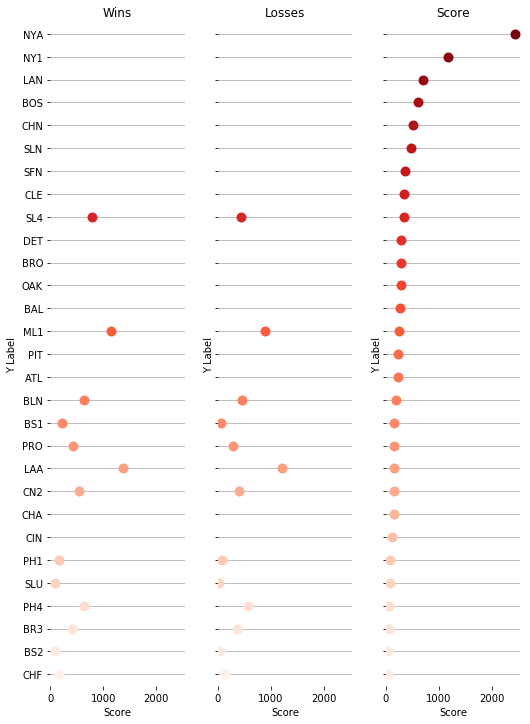

In [14]:
print('Teams by Wins, Losses and Score')
stripplot(best_teams, titles=['Wins', 'Losses', 'Score'])

Here is a graphical description of the difference between *Wins* and *Losses* for the best teams.

## Best Teams Score Distribution

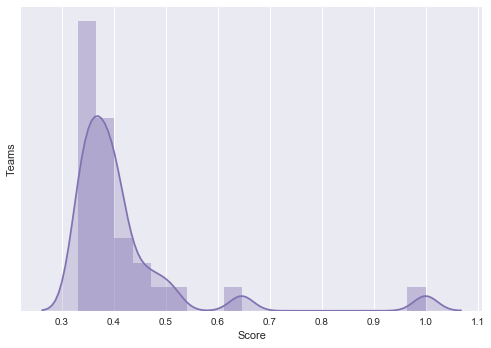

In [167]:
distribution(best_teams['score_norm'].values, color='m', labels=('Score', 'Teams'))

## Best Players Score Distribution
Here we take a sample of the highest 2% of best players.

,W,L,score,score_norm
count,18912.000000,18912.000000,18912.000000,18912.000000
mean,33523.823551,32767.876428,755.947124,0.307818
std,36578.098625,35322.251635,3413.568483,0.049262
min,0.000000,4.000000,-20574.000000,0.000000
25%,9082.000000,8707.000000,-480.000000,0.289982
50%,19248.500000,18836.000000,238.000000,0.300343
75%,48576.250000,47457.000000,1220.000000,0.314515
max,245091.000000,258283.000000,48720.000000,1.000000


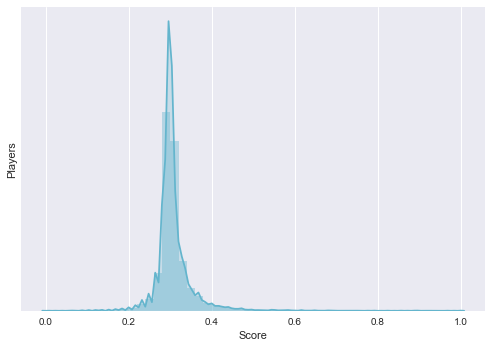

In [168]:
players_results = dataframes['Appearances'].merge(teams_results, on='teamID', how='inner').groupby(['playerID'], as_index=False)['W', 'L', 'score'].sum()
pscores = players_results['score'].values
pscore_norm = MinMaxScaler().fit_transform(pscores.astype(np.float64).reshape(-1, 1)).flatten()
players_results['score_norm'] = pscore_norm
display(players_results.describe())
distribution(pscore_norm, labels=('Score', 'Players'))

Statistical values of players results after calculating score (W - L) and normalized score using *Feature Scaling*.

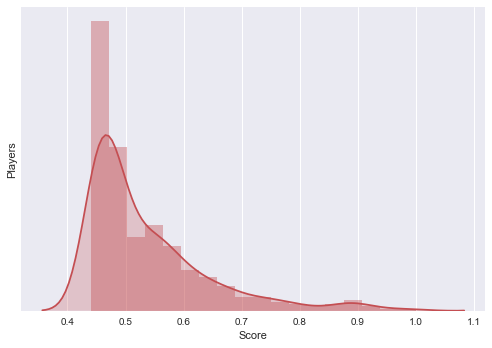

In [169]:
players_appearences = players_results.merge(dataframes['Appearances'].groupby('playerID', as_index=False)['teamID'].count(), on='playerID', how='left')
best_players_appearences = players_appearences[players_appearences['score'] > players_appearences.quantile(q=0.98)['score']]
distribution(best_players_appearences['score_norm'].values, color='r', labels=('Score', 'Players'))

*Distribution of best players scores*

## Question 1
### Which school did winners go to?
Surprisingly, the best player regarding games played in winning teams, does not report school, as you can see below.

In [18]:
def set_to_str(x):
    x = ','.join([str(c) for c in x])
    return x
def set_to_count(x):
    if str(x) == '{nan}':
        return 0
    return len(x)
schools_of_winners = best_players_appearences.merge(dataframes['CollegePlaying'], on='playerID', how='left')
best_players_appearences_with_schools = best_players_appearences.merge(schools_of_winners, on='playerID', how='left').groupby('playerID', as_index=False).agg({'schoolID': lambda x: set(x)})
best_players_appearences_with_schools['school_count'] = best_players_appearences_with_schools['schoolID'].apply(set_to_count)
display(best_players_appearences_with_schools.head())

,playerID,schoolID,school_count
0,aceveal01,{nan},0
1,alexado01,{nan},0
2,allenjo02,{nan},0
3,aloufe01,{nan},0
4,amesre01,{nan},0


*Best players don't report schools*

### Missing Values
It was not possible to determine whether schools could have influenced on players on the whole set of players due to missing schools values. I will have to exclude entries with no schools in order to generate a ranking of best schools based on players that do have reported one or more schools. To do so I will count schools for each player and then exclude those entries with school = 0.

### Top10 Schools regarding best players

In [182]:
best_players_with_school_and_score = best_players_appearences.merge(best_players_appearences_with_schools, on='playerID', how='left')
top10_schools = best_players_with_school_and_score[best_players_with_school_and_score['school_count'] > 0].sort_values('score', ascending=False).apply({'schoolID': lambda x: ','.join(x)}).iloc[0:10]
display_1d_array(top10_schools.values, col_name='School')

,School
1,columbia
2,alcalho
3,txsjjcn
4,ulala
5,sliprock
6,fordham
7,ekentucky
8,casjcco
9,catholic
10,maryland


## Question 2
### Did winners get the highest salaries?
Apparently participating the most winning games doesn't have a strict correlation with highest salaries, but they are still in the massive salaries list.
To calculate the salaries, I took the maximum salary for each player/team.

As you can see underneath, highest salaries didn't go to players of winning teams.

In [79]:
def calculate_mean_salary(x):
    count = len(x)
    return ((1/count) * np.sum(x)/1000)

best_players_salaries = dataframes['Salaries'].merge(best_players_with_school_and_score, on='playerID', how='right')[['playerID', 'salary', 'yearID', 'score']].dropna().sort_values(['salary'], ascending=False)
bpsalaries = best_players_salaries['salary'].values
bscore_norm = MinMaxScaler().fit_transform(bpsalaries.astype(np.float64).reshape(-1, 1)).flatten()
best_players_salaries['salary_norm'] = bpscore_norm

highest_salaries_players_with_score = best_players_salaries.groupby('playerID', as_index=False).agg({'salary': calculate_mean_salary, 'salary_norm': np.mean}).merge(players_results, on='playerID', how='left')
display(highest_salaries_players_with_score[['salary', 'salary_norm', 'score', 'score_norm']].describe())

,salary,salary_norm,score,score_norm
count,123.000000,123.000000,123.000000,123.000000
mean,2836.640718,0.085959,15774.203252,0.524551
std,3573.461658,0.108287,7601.876470,0.109705
min,106.833333,0.003237,9990.000000,0.441077
25%,687.499875,0.020833,10857.000000,0.453589
50%,1365.555556,0.041380,12555.000000,0.478093
75%,3019.633342,0.091504,17509.000000,0.549586
max,18109.829636,0.548783,48720.000000,1.000000


In this statistical summary it is really clear that highest scores, meaning more Wins than Losses, does not represent a higher salary for players.

In [210]:
max_salary_idx = highest_salaries_players_with_score[['salary_norm']].idxmax()
max_score_idx = highest_salaries_players_with_score[['score_norm']].idxmax()
print('Highest salary (x1000)')
display(highest_salaries_players_with_score.loc[max_salary_idx])
print('Highest score')
display(highest_salaries_players_with_score.loc[max_score_idx])

Highest salary (x1000)


,playerID,salary,salary_norm,W,L,score,score_norm
91,rodrial01,18109.829636,0.548783,152507,126224,26283,0.676206


Highest score


,playerID,salary,salary_norm,W,L,score,score_norm
49,jeterde01,13927.268053,0.422038,201680,152960,48720,1.0


Here is the difference between the player getting the highest salary and the one participating the more winning games.

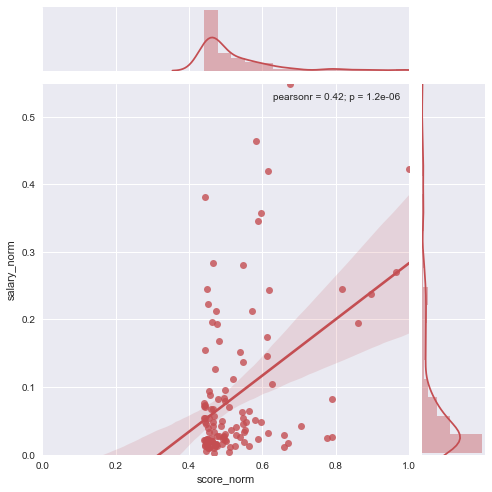

In [209]:
plot_correlation2(data=highest_salaries_players_with_score, x_var="score_norm", y_var="salary_norm")

Do best players get higher salaries? It is pretty difficult to see using only the variables on this report. It might be interesting to include more variables like manager biases or getting a better normalization of salaries (money does not have the same value now and 100 years ago).

## Question 3
### Is there a correlation between winning teams and managers?
Shapes are pretty similar, although the scales are different.

Managers scores


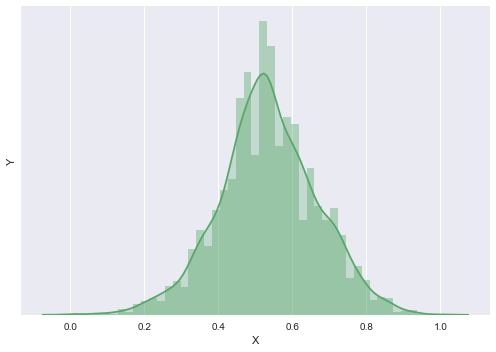

In [359]:
managers = dataframes['Managers']
managers['score'] = managers.apply(lambda x: x['W'] - x['L'], axis=1)
mscore = managers['score'].values
mscore_norm = MinMaxScaler().fit_transform(mscore.astype(np.float64).reshape(-1, 1)).flatten()
managers = managers.groupby('playerID', as_index=False).sum()[['playerID', 'score', 'score_norm', 'rank']]
best_managers = managers.sort_values('score', ascending=False)
print('Managers scores')
distribution(mscore_norm, color='g')

The shape of this distribution looks pretty similar to teams and players scores. Therefore I could say that there is a correlation. Let's see.

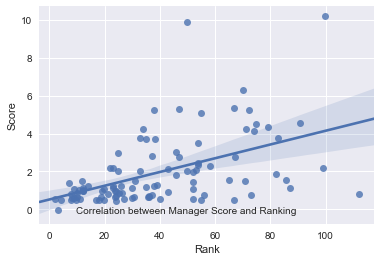

In [366]:
data = best_managers.sort_values('score_norm', ascending=False).iloc[0:100][['playerID', 'score_norm', 'rank']]
plot_correlation(x=data['rank'], y=data['score_norm'], xlabel='Rank', ylabel='Score', legend='Correlation between Manager Score and Ranking')

Now I am sure that best teams were managed by the best managers. This shows me how important leadership is to succeed.

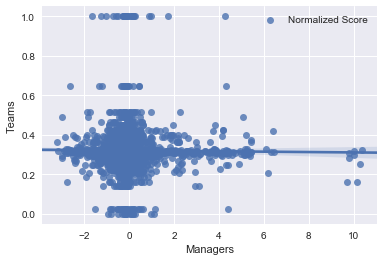

In [187]:
sample_size = 3000
teams_scores_sample = np.random.choice(teams_results['score_norm'].values, size=sample_size)
managers_scores_sample = np.random.choice(managers['score_norm'].values, size=sample_size)
plot_correlation(managers_scores_sample, teams_scores_sample, xlabel='Managers', ylabel='Teams', legend='Normalized Score')

I think that there is a not so string correlation between best teams and managers. However thos few values touching the x-value 10 seem to be outliers.

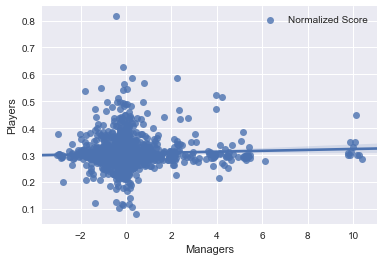

In [184]:
sample_size = 2000
players_scores_sample = np.random.choice(players_results['score_norm'].values, size=sample_size)
managers_scores_sample = np.random.choice(managers['score_norm'].values, size=sample_size)
plot_correlation(managers_scores_sample, players_scores_sample, xlabel='Managers', ylabel='Players', legend='Normalized Score')

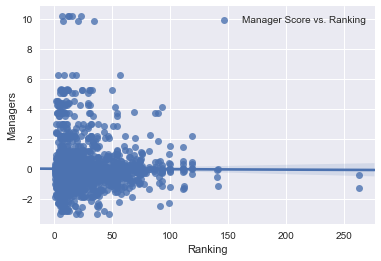

In [206]:
managers_ranking_sample = np.random.choice(managers['rank'].values, size=sample_size)
plot_correlation(y=managers_scores_sample, x=managers_ranking_sample, ylabel='Managers', xlabel='Ranking', legend='Manager Score vs. Ranking')

### Players scores

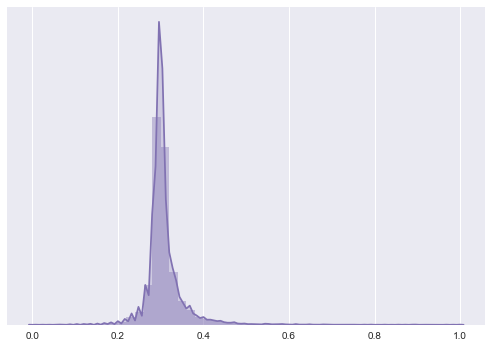

In [77]:
distribution(pscore_norm, color='m')

## Limitations

I think there are many variables that I could include to see whether data could tell us anything more interesting, perhaps using Pitching, Fielding and Batting. Even curious patterns like birth or death places, or even doing the opposite job: finding patterns correlating with losing teams.

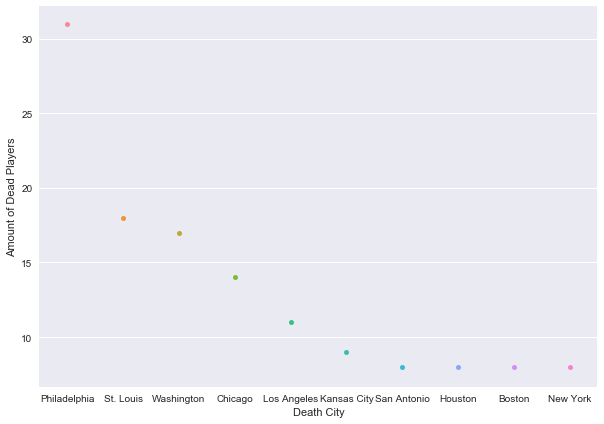

In [355]:
player_death_city = dataframes['Master'][['playerID', 'deathCity']].dropna().merge(players_results, on='playerID', how='left')
worst_players = player_death_city.sort_values('score_norm')[['playerID', 'deathCity', 'score_norm']].dropna()
top10_worst = worst_players[worst_players['score_norm'] < worst_players.quantile(q=0.1)['score_norm']].sort_values('score_norm').groupby('deathCity', as_index=False)['playerID'].count().sort_values('playerID', ascending=False).iloc[0:10]
#display(top10_worst.iloc[0:10])
f, ax = plt.subplots(figsize=(10, 7))
#sns.countplot(y="deathCity", data=top10_worst.iloc[0:10], color="c");
sns.stripplot(x="deathCity", y="playerID", data=top10_worst)
ax.set(xlabel='Death City', ylabel='Amount of Dead Players')

*Please don't play in Philadelphia!*

## Conclusion

Last chart was just for fun, but leadership seems to be always involved in success: Players and teams were better with best ranked managers.